## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [2]:
import pandas as pd
data=pd.read_csv('shopping_trends_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

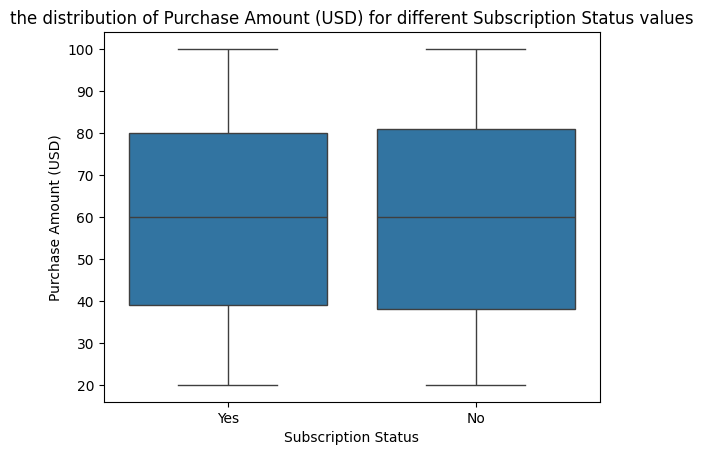

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Subscription Status',y='Purchase Amount (USD)',data=data)
plt.title('the distribution of Purchase Amount (USD) for different Subscription Status values')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

The subscribers and nonsubscribers have almost the same range of Purchase Amount.

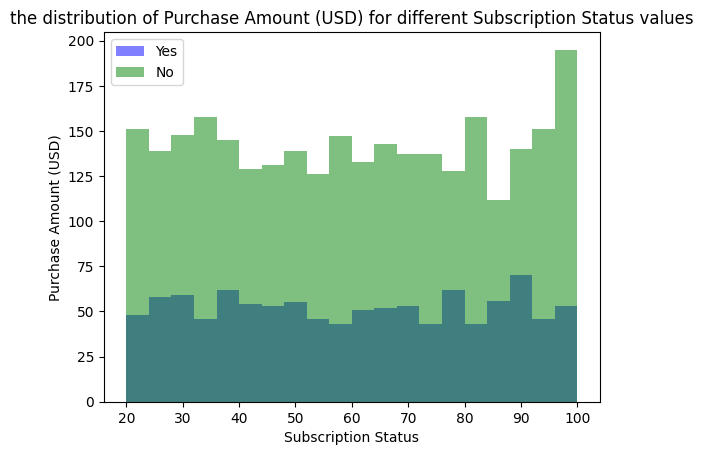

In [9]:
yes_values=data[data['Subscription Status']=='Yes']['Purchase Amount (USD)']
no_values=data[data['Subscription Status']=='No']['Purchase Amount (USD)']
plt.hist(yes_values,bins=20,alpha=0.5,label='Yes',color='blue')
plt.hist(no_values,bins=20,alpha=0.5,label='No',color='green')
plt.title('the distribution of Purchase Amount (USD) for different Subscription Status values')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.show()

 The purchase amount  for subscribers is lesser than purchase amount for nonsubscribers.

Text(0.5, 1.0, 'the distribution of Purchase Amount (USD) for different Subscription Status values')

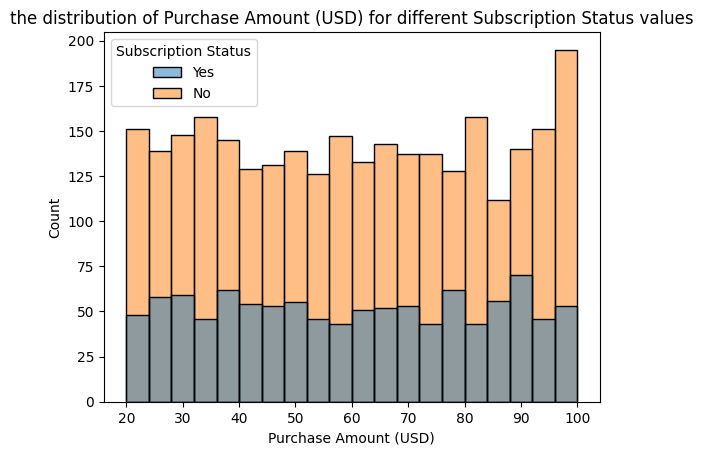

In [12]:
sns.histplot(data=data, x='Purchase Amount (USD)', hue='Subscription Status', bins=20)
plt.title('the distribution of Purchase Amount (USD) for different Subscription Status values')


 The purchase amount  for subscribers is lesser than purchase amount for nonsubscribers.

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

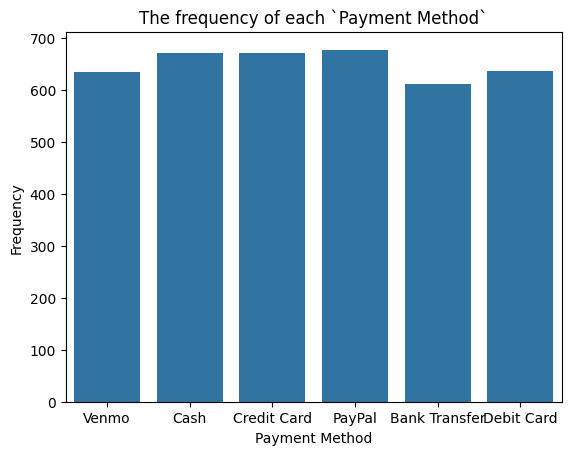

In [13]:
sns.countplot(x='Payment Method',data=data)
plt.title('The frequency of each `Payment Method`')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

The 'paypal' payment method is the most used method followed by 'credit card' and 'cash'.

[677 671 670 636 634 612]


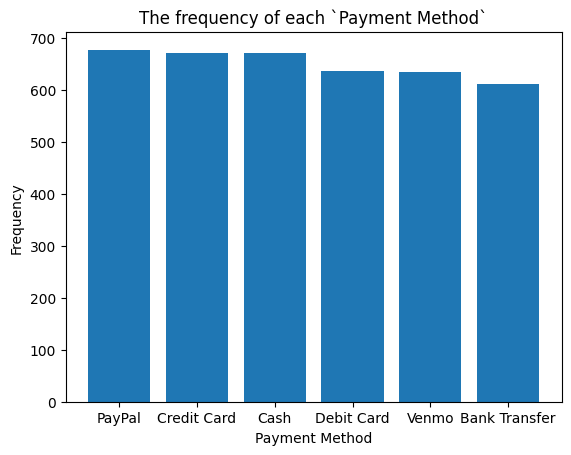

In [ ]:
x=data['Payment Method'].value_counts().index
y=data['Payment Method'].value_counts().values
plt.bar(x,y)
plt.title('The frequency of each `Payment Method`')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

The 'paypal' payment method is the most used method followed by 'credit card' and 'cash'.

In [15]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

<function matplotlib.pyplot.show(close=None, block=None)>

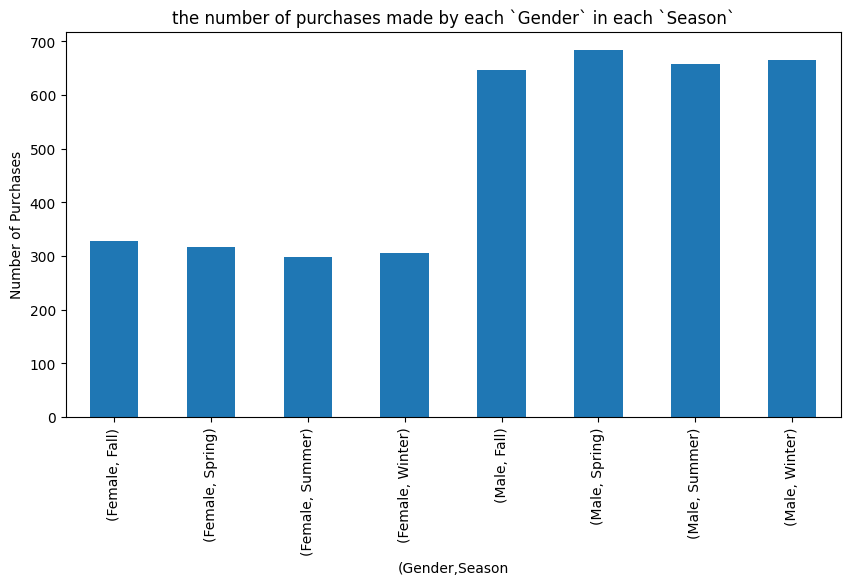

In [51]:
gender_season_counts=data.groupby(['Gender','Season']).size()
gender_season_counts.plot(kind='bar',figsize=(10,5))
plt.title('the number of purchases made by each `Gender` in each `Season`')
plt.xlabel('(Gender,Season')
plt.ylabel('Number of Purchases')
plt.show

Males make more Purchases in spring than all season.

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

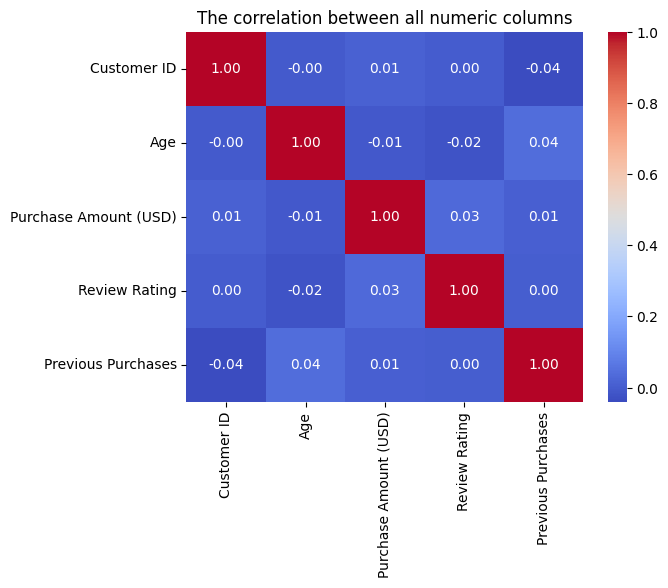

In [53]:
numerical_data=data.select_dtypes(include=['float64','int64'])
correlation_matrix=numerical_data.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('The correlation between all numeric columns')
plt.show()

There are a direct correlation between (customer id , purchase amount) , (age , previous purchases) and (previous purchases , purchase amount) and
an inverse correlation between (customer id , previous purchases) , (age , reviewing rating) and (age , purchase amount).

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

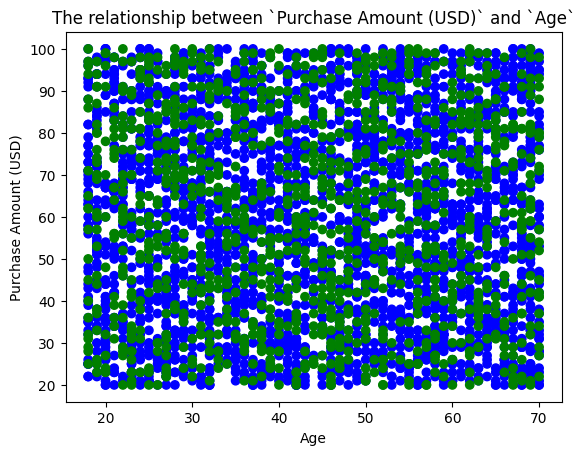

In [62]:
colors=['blue' if g=='Male' else 'green' for g in data['Gender']]
plt.scatter(data['Age'],data['Purchase Amount (USD)'],c=colors)
plt.title('The relationship between `Purchase Amount (USD)` and `Age`')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

No strong correlation between Age and Purchase Amount (inverse correlation).

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [63]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [66]:
categories_sizes_counts=data.groupby(['Category','Size']).size().unstack(fill_value=0)
categories_sizes_counts

Size,L,M,S,XL
Category,,,,
Accessories,307,562,230,141
Clothing,481,778,284,194
Footwear,172,267,93,67
Outerwear,93,148,56,27


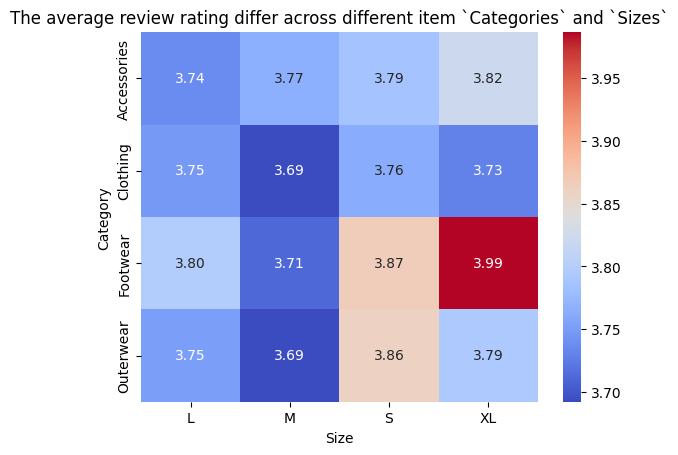

In [69]:
pivot=data.pivot_table(
    values='Review Rating',
    index='Category',
    columns='Size',
    aggfunc='mean'
)
sns.heatmap(pivot,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('The average review rating differ across different item `Categories` and `Sizes`')
plt.xlabel('Size')
plt.ylabel('Category')
plt.show()

The XL Footwear has the higher reviewing rate.

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

In [99]:
season_shipping_grouped=data.groupby(['Season','Shipping Type'])['Purchase Amount (USD)'].mean()
season_shipping_grouped

Season  Shipping Type 
Fall    2-Day Shipping    61.928571
        Express           63.159763
        Free Shipping     60.660714
        Next Day Air      59.771930
        Standard          61.380952
        Store Pickup      62.641379
Spring  2-Day Shipping    58.157303
        Express           57.739884
        Free Shipping     61.682927
        Next Day Air      58.453333
        Standard          56.522293
        Store Pickup      59.774011
Summer  2-Day Shipping    60.089655
        Express           58.337931
        Free Shipping     60.474860
        Next Day Air      58.238411
        Standard          56.903614
        Store Pickup      56.449704
Winter  2-Day Shipping    63.186667
        Express           62.547170
        Free Shipping     58.810976
        Next Day Air      58.011364
        Standard          58.901840
        Store Pickup      61.182390
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Season', ylabel='Purchase Amount (USD)'>

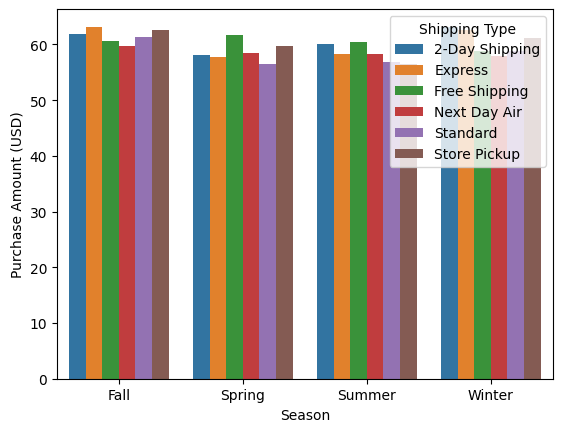

In [106]:
season_shipping_grouped=data.groupby(['Season','Shipping Type'])['Purchase Amount (USD)'].mean().reset_index()
sns.barplot(data=season_shipping_grouped, x='Season', y='Purchase Amount (USD)', hue='Shipping Type')

Almost the '2-Day Shipping' in winter and 'Express' in fall Shipping types have the highest purchase amounts.  

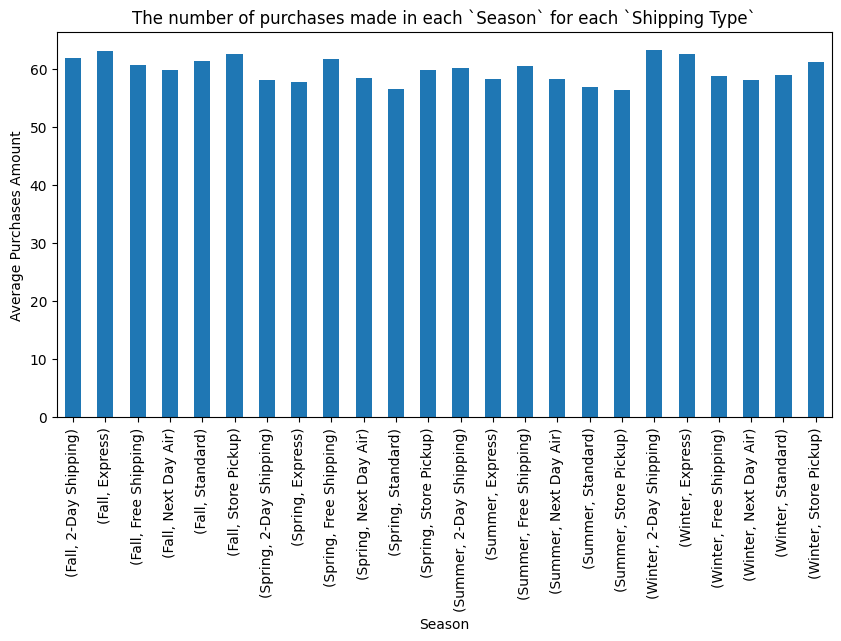

In [ ]:
season_shipping_grouped=data.groupby(['Season','Shipping Type'])['Purchase Amount (USD)'].mean()
season_shipping_grouped.plot(kind='bar',figsize=(10,5))
plt.title('The number of purchases made in each `Season` for each `Shipping Type`')
plt.xlabel('Season')
plt.ylabel('Average Purchases Amount')
plt.show()

Almost the '2-Day Shipping' in winter and 'Express' in fall Shipping types have the highest purchase amounts.  

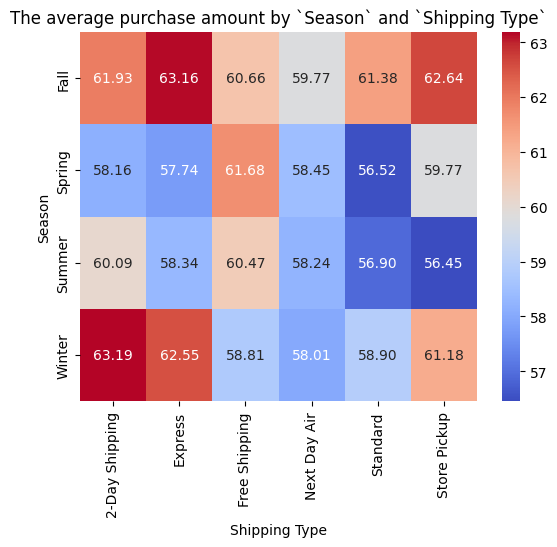

In [108]:
pivot2=data.pivot_table(values='Purchase Amount (USD)', index='Season', columns='Shipping Type', aggfunc='mean')
sns.heatmap(pivot2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('The average purchase amount by `Season` and `Shipping Type`')
plt.xlabel('Shipping Type')
plt.ylabel('Season')
plt.show()

Almost the '2-Day Shipping' in winter and 'Express' in fall Shipping types have the highest purchase amounts.  

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

In [75]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


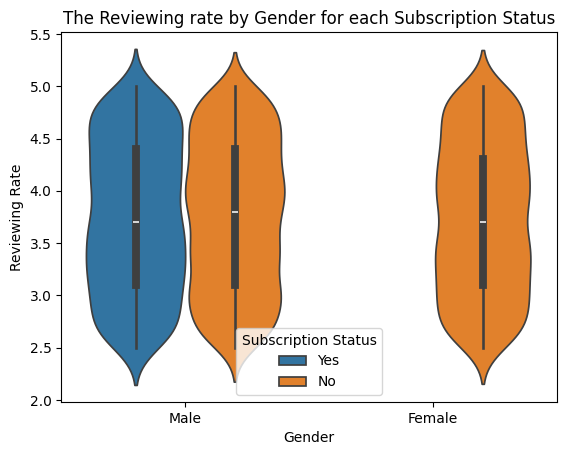

In [86]:
sns.violinplot(data=data,x='Gender',y='Review Rating',hue='Subscription Status')
plt.title('The Reviewing rate by Gender for each Subscription Status')
plt.xlabel('Gender')
plt.ylabel('Reviewing Rate')
plt.legend(title='Subscription Status')
plt.show()

The subscribers male and female and nonsubscripers female making almost the same reviewing rates. 

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

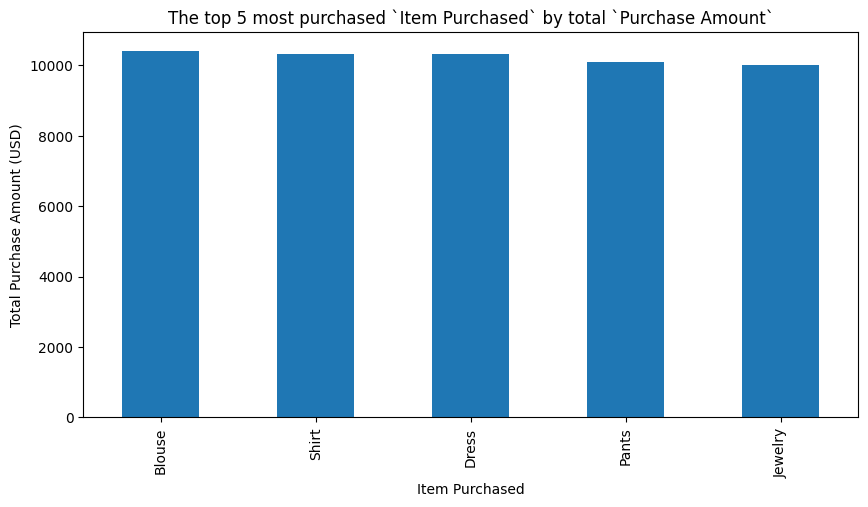

In [111]:
purchase_grouped=data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)
purchase_grouped.plot(kind='bar',figsize=(10,5))
plt.title('The top 5 most purchased `Item Purchased` by total `Purchase Amount`')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

Blouse item is the highest purchased.

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [109]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


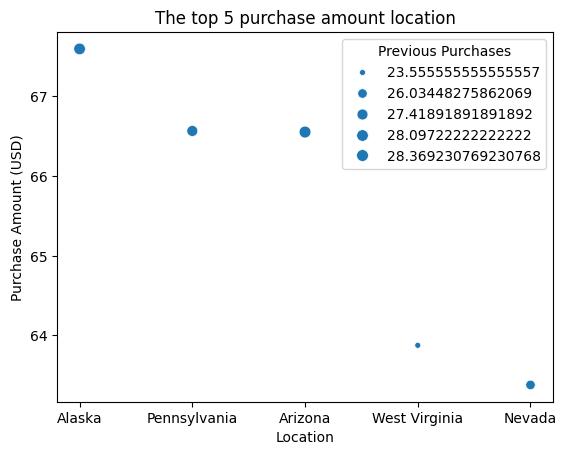

In [124]:
location_purchase_grouped=data.groupby('Location')[['Purchase Amount (USD)', 'Previous Purchases']].mean()
top_5=location_purchase_grouped.nlargest(5,'Purchase Amount (USD)').reset_index()
sns.scatterplot(data=top_5,x='Location',y='Purchase Amount (USD)',size='Previous Purchases')
plt.title('The top 5 purchase amount location')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Previous Purchases')
plt.show()

Alaska has the highest average purchase amounts and previous purchases.

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

In [125]:
cross_table=pd.crosstab(index=data['Gender'],columns=data['Size'])
cross_table

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


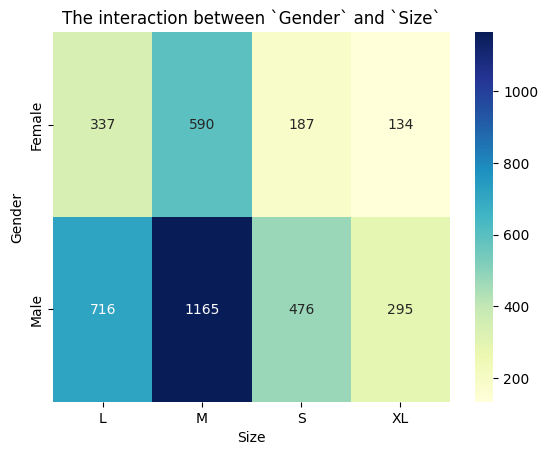

In [128]:
sns.heatmap(cross_table,annot=True,fmt='d',cmap='YlGnBu')
plt.title('The interaction between `Gender` and `Size`')
plt.xlabel('Size')
plt.ylabel('Gender')
plt.show()

The size that males most purchased is M size.

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [133]:
cross_table2=pd.crosstab(index=data['Promo Code Used'],columns=data['Frequency of Purchases'])
cross_table2

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Promo Code Used,,,,,,,
No,334,321,326,299,316,322,305
Yes,238,226,258,243,237,241,234


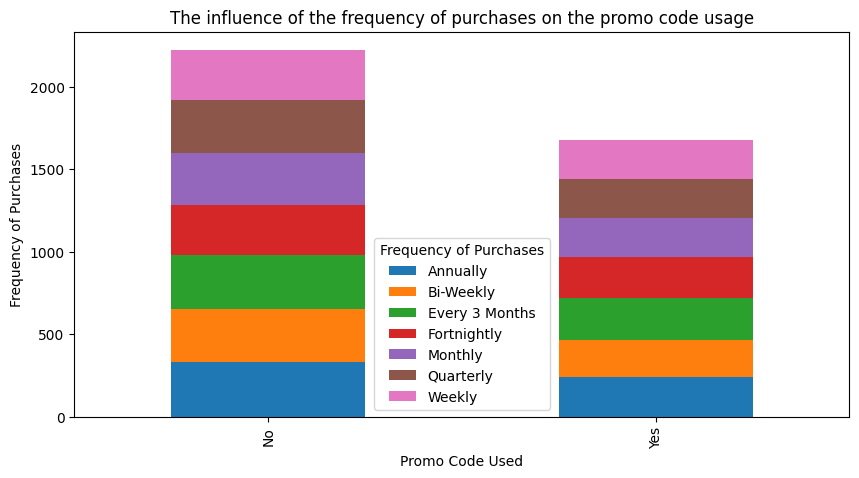

In [137]:
cross_table2.plot(kind='bar', figsize=(10, 5),stacked=True)
plt.title('The influence of the frequency of purchases on the promo code usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Frequency of Purchases')
plt.show()

The frequency of purchases that not use promo code greater than the frequency of purchases that use promo code.

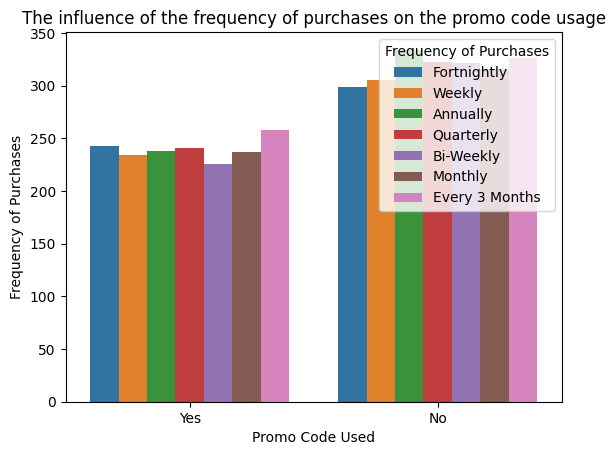

In [138]:
sns.countplot(data=data,x='Promo Code Used',hue='Frequency of Purchases')
plt.title('The influence of the frequency of purchases on the promo code usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Frequency of Purchases')
plt.show()

The frequency of purchases that not use promo code greater than the frequency of purchases that use promo code.

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

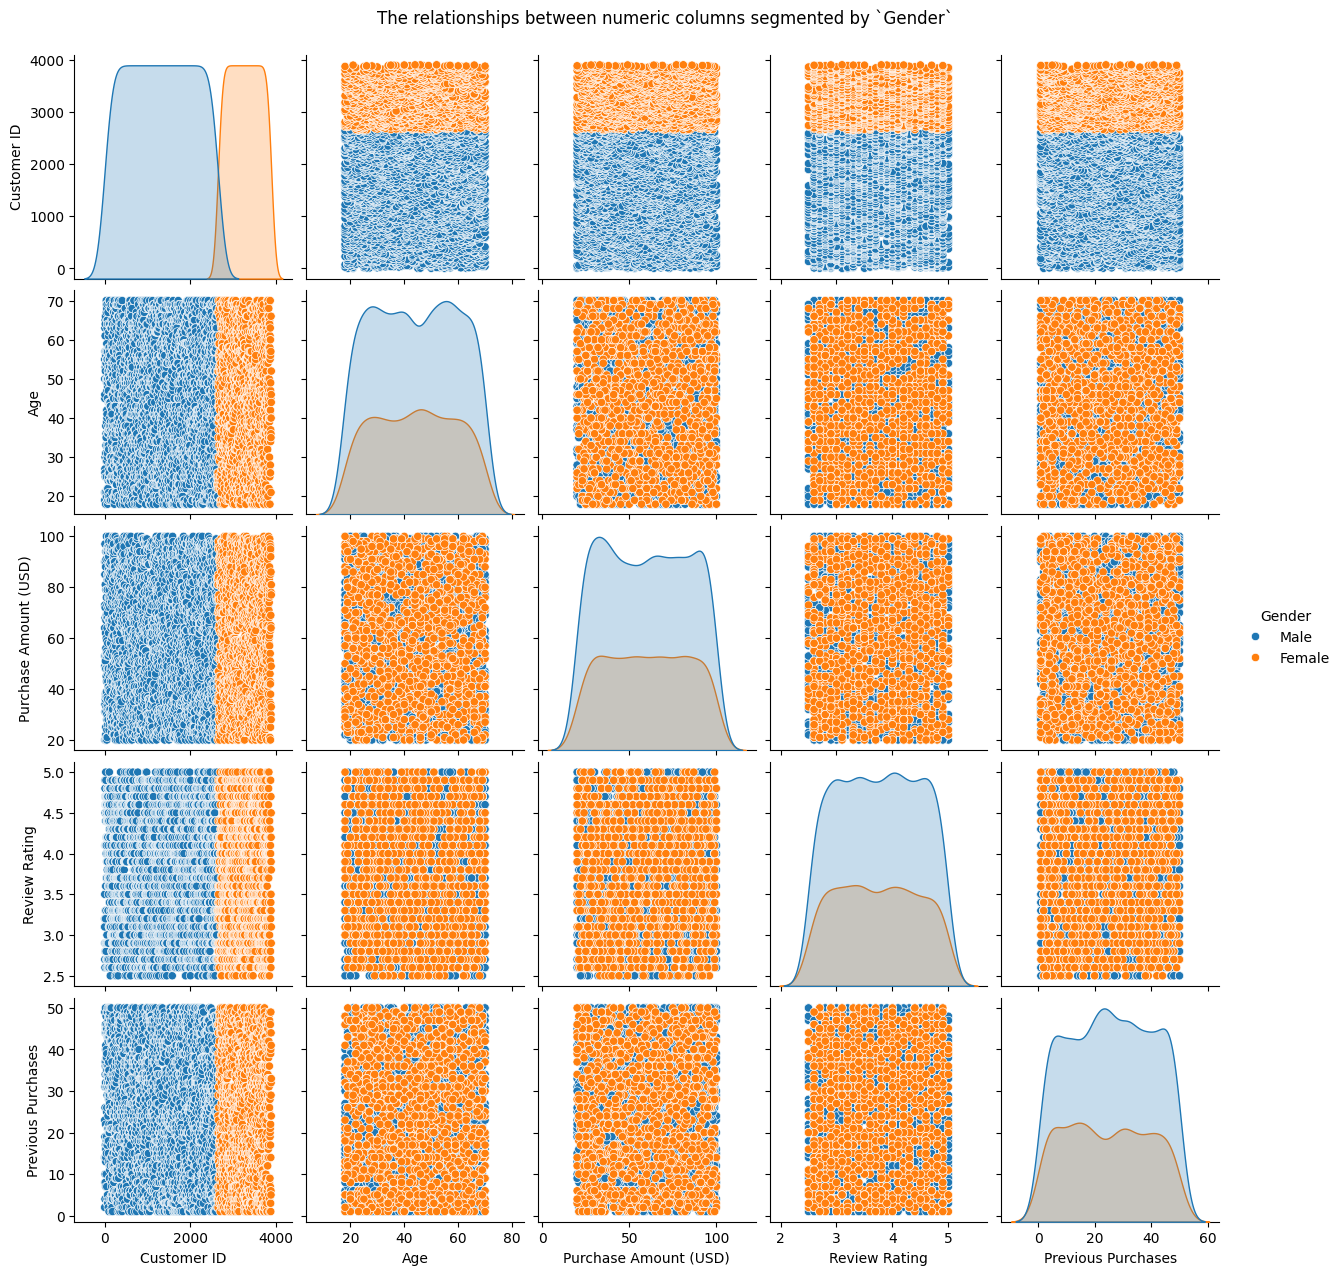

In [147]:
plt.Figure(figsize=(10, 10))
sns.pairplot(data,hue='Gender')
plt.suptitle('The relationships between numeric columns segmented by `Gender`',y=1.02)
plt.show()